In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

2024-01-06 08:19:03.014663: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-06 08:19:03.192126: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-06 08:19:04.050848: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64:/usr/local/cuda-11.3/lib64
2024-01-06 08:19:04.050942: W te

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
with tf.compat.v1.Session(config=config) as sess:

    # 메모리 40% 할당
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.9
    sess = tf.compat.v1.Session(config=config)

2024-01-02 18:30:17.434840: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-02 18:30:18.447137: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78900 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:ca:00.0, compute capability: 8.0
2024-01-02 18:30:18.474969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78900 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:ca:00.0, compute capability: 8.0


In [2]:
import pickle

with open('./Pretraning_data/ZINC_10M_data','rb') as file:
    train = pickle.load(file)

In [ ]:
from SmilesPE import tokenizer

tokenizer.atomwise_tokenizer(train[1])

In [8]:
from SmilesPE import tokenizer

In [5]:
from rdkit import Chem
from tqdm import tqdm
def Chem_generator(smiles):
    res_list = []
    for i in tqdm(smiles):
        mol = Chem.MolFromSmiles(i)
        temp = []
        index = 0
        while(len(set(temp))!=4 and index != 100):
            index+=1
            temp.append(Chem.MolToSmiles(mol,doRandom=True))
        res_list+=list(set(temp))
    return res_list

In [3]:
train_1 = Chem_generator(train)

  0%|          | 432/12525050 [00:00<1:37:37, 2138.06it/s]

100%|██████████| 12525050/12525050 [1:14:21<00:00, 2807.07it/s]


In [4]:
from tdc.single_pred import Tox
from Module import RDK as rk
import atomInSmiles
from Module import Fine_tune
from SmilesPE import tokenizer

In [5]:
from multiprocessing import Pool
from tqdm import tqdm
from multiprocessing import Process, Value, Array
from multiprocessing import Process,Manager,current_process
from Module import RDK as rk
import atomInSmiles 
from SmilesPE import tokenizer

train_set = []
for i in tqdm(train_1):
    train_set.append(tokenizer.atomwise_tokenizer(i))


  0%|          | 0/50100189 [00:00<?, ?it/s]

100%|██████████| 50100189/50100189 [08:07<00:00, 102816.16it/s]


Text(0, 0.5, 'counts')

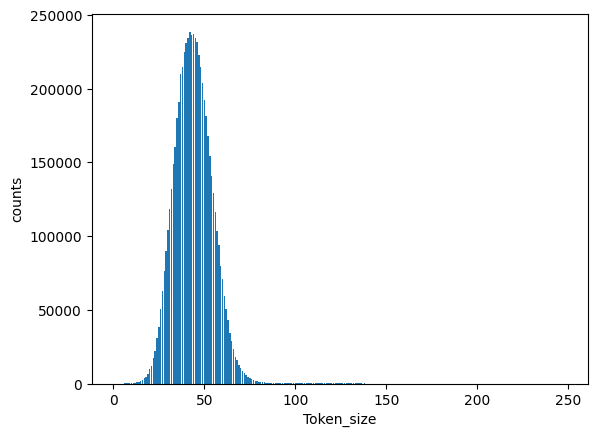

In [47]:
import matplotlib.pyplot as plt
length_list = {}


for index,i in enumerate(train_set_plus):
    try:
        length_list[len(i)]=length_list[len(i)]+1
    except:
        length_list[len(i)] = 1
    
plt.bar(length_list.keys(),length_list.values())
plt.xlabel(xlabel='Token_size')
plt.ylabel('counts')    

In [7]:
temp_dict = {}
for i in train_set:
    for j in i:
        try:
            temp_dict[j] = temp_dict[j] + 1
        except:
            temp_dict[j] = 1
remove_dict = {}
for i in temp_dict.keys():
    if temp_dict[i]<50:
        print(i,temp_dict[i])
        remove_dict[i] = 1

remove_list = []
for index,i in enumerate(train_set):
    for j in i:
        try:
            remove_dict[j]
            remove_list.append(index)
            break
        except:
            continue

remove_list.sort(reverse=True)

[P@H+] 48
[P@@H+] 48
9 12
%10 4
[CH] 16
p 16
[CH2] 24
[Si-] 4
[P@+] 33
[P@@+] 31
[NH] 8
[17O] 12
[p+] 4


In [2]:
import pickle
with open('./Pretraning_data/Random_ZINC_50M_SMILE_tokken.pkl','rb') as file:
    train_set = pickle.load(file)

In [ ]:
train_set

In [3]:
import pickle
molecule_dictionary = {'<start>':1,'<end>':2,'<unknown1>':3,'<unknown2>':4,'<unknown3>':5,'<unknow4>':6,'<unknown5>':7}

for molecule in train_set:
    for atom in molecule:
        try:
            molecule_dictionary[atom]
        except:
            molecule_dictionary[atom] = len(molecule_dictionary)+1
with open('./BERT/SMILE/1M_random_ZINC_word2index.pkl','wb') as file:
    pickle.dump(molecule_dictionary,file)
len(molecule_dictionary)

71

In [3]:
import pickle
with open('./BERT/SMILE/1M_random_ZINC_word2index.pkl','rb') as file:
    molecule_dictionary = pickle.load(file)
len(molecule_dictionary)

141

In [4]:
from tqdm import tqdm
import numpy as np 

def word_to_index(train_set,dict):
    result = []
    for molecule in tqdm(train_set):
        temp_list = []
        temp_list.append(1)
        for atom in molecule:
            temp_list.append(dict[atom])
        while len(temp_list)!=200:
            temp_list.append(0)
        result.append(temp_list)
    return result
embedding_word = word_to_index(train_set,molecule_dictionary)   
embedding_word = np.array(embedding_word)

  0%|          | 13684/50099943 [00:00<12:10, 68564.96it/s]

100%|██████████| 50099943/50099943 [14:14<00:00, 58634.07it/s] 


In [6]:
from tdc.single_pred import Tox
from Module import RDK
import atomInSmiles
from SmilesPE import tokenizer
def word_to_index(train_set,dict):
    result = []
    for molecule in tqdm(train_set):
        temp_list = []
        temp_list.append(1)
        for atom in molecule:
            temp_list.append(dict[atom])
        while len(temp_list)!=200:
            temp_list.append(0)
        result.append(temp_list)
    return result
train_val,tox_info = Tox(name = 'AMES').get_data(format = 'DeepPurpose')
train_set_val = []

train_val = Chem_generator(train_val[:5000])


for i in train_val:
    train_set_val.append(tokenizer.atomwise_tokenizer(i))
val_remove_list = []
for index,i in enumerate(train_set_val):
    for j in i:
        try:
            molecule_dictionary[j]
        except:
            val_remove_list.append(index)
            break
val_remove_list.sort(reverse=True)

for i in val_remove_list:
    train_set_val.pop(i)

embedding_word_val = word_to_index(train_set_val,molecule_dictionary)   
embedding_word_val = np.array(embedding_word_val)

Found local copy...
Loading...
Done!
100%|██████████| 19957/19957 [00:00<00:00, 73565.98it/s]


In [9]:
embedding_word_val

array([[ 1, 11, 10, ...,  0,  0,  0],
       [ 1, 20, 19, ...,  0,  0,  0],
       [ 1, 11, 10, ...,  0,  0,  0],
       ...,
       [ 1, 29, 11, ...,  0,  0,  0],
       [ 1,  8, 10, ...,  0,  0,  0],
       [ 1,  8, 10, ...,  0,  0,  0]])

In [7]:
import random
max = 16
mask_input_val = []
for j in tqdm(train_set_val):
        value = []
        number = int(len(j)*0.15)
        if number>max:
                max = number
        if number == 0:
                number = 1
        value += random.sample(range(1,len(j)),number)
        mask_input_val.append(value)
        
        
for j in mask_input_val:
        while(len(j)<max):
                j.append(-1)


random_value_val = embedding_word_val.copy()        
for _,index in enumerate(mask_input_val):
        for j in index:
                if j != -1:
                        prob = np.random.rand(1)[0]
                        if prob < 0.8:
                                random_value_val[_][j] = 5
                        elif prob > 0.9:
                                temp1 = random.sample(range(0,301),1)[0]
                                random_value_val[_][j] = temp1
                                
output_val = tf.multiply(tf.reduce_sum(tf.one_hot(mask_input_val,200),axis=1),embedding_word_val)

100%|██████████| 19957/19957 [00:00<00:00, 286238.01it/s]
2024-01-06 08:42:07.077176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-06 08:42:07.560565: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78900 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:ca:00.0, compute capability: 8.0


In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import *
early_stopping_cb = EarlyStopping(patience=6, monitor='loss',restore_best_weights=True)

In [9]:
def custom_loss(y_true, y_pred):
    output = tf.one_hot(tf.cast(tf.boolean_mask(y_true,tf.cast(y_true,bool)),tf.int32),len(molecule_dictionary))
    loss = tf.keras.losses.CategoricalCrossentropy()(output,y_pred)
    return loss

In [10]:
def Custom_metric(y_true,y_pred):
    predictions = tf.argmax(y_pred,axis=1)
    true = tf.boolean_mask(y_true,tf.cast(y_true,bool))
    return  tf.metrics.Accuracy()(predictions,true)
def Mask_acc(y_true, y_pred):
    score = tf.py_function(func=Custom_metric, inp=[y_true, y_pred], Tout=tf.float32,  name='Custom_acc') 
    return score

In [11]:
class BERT(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim):
        super(BERT, self).__init__()
        self.transformer = TransformerBlock(emb_dim,num_heads,ff_dim)
        
        self.embedding = TokenAndPositionEmbedding(200,3500,256)
        self.dense = layers.Dense(250,activation = 'gelu')
        self.classify = layers.Dense(len(molecule_dictionary),activation = 'softmax')
    def call(self, inputs, mask_index,pretrain = False):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
        
        hidden = self.embedding(inputs)
        for i in range(8):
            hidden = self.transformer(hidden)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = tf.boolean_mask(output,boolean_mask)
            output = self.dense(output)
            output = layers.Dropout(0.1)(output)
            output = self.classify(output)
            return output
        else:
            return hidden

In [15]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim,mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim,mask_zero = True)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=1, limit=maxlen+1, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [16]:
from Module import custom_layers

In [17]:
BERT_tensor = custom_layers.BERT_tensor_small

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
import pickle
import copy
import tensorflow as tf
import tensornetwork as tn
import numpy as np
import tensornetwork as tn
class TNLayer(tf.keras.layers.Layer):
    def __init__(self,Tensor_dimention = 2):
        super(TNLayer, self).__init__()
        # Create the variables for the layer.


    
        initializer = tf.keras.initializers.RandomNormal(stddev=1/np.sqrt(4+Tensor_dimention-1))
        initializer1 = tf.keras.initializers.RandomNormal(stddev=1/np.sqrt(4+Tensor_dimention+Tensor_dimention-1))
        self.A1 = tf.Variable(initializer(shape=[4,Tensor_dimention,4]),name="a1", trainable=True)
        self.A2 = tf.Variable(initializer1(shape=[4,Tensor_dimention,Tensor_dimention,8]),name="a2", trainable=True)
        self.A3 = tf.Variable(initializer1(shape=[4,Tensor_dimention,Tensor_dimention,8]),name="a3", trainable=True)
        self.A4 = tf.Variable(initializer(shape=[4,Tensor_dimention,4]),name="a4", trainable=True)
        


        self.bias = tf.Variable(tf.zeros(shape=(256*4)), name="bias", trainable=True)
        
    def call(self, inputs):
        # Define the contraction.
        # We break it out so we can parallelize a batch using
        # tf.vectorized_map (see below).
        Nodes = [tn.Node(self.A1,'a1',backend="tensorflow")]
        Nodes+=[tn.Node(self.A2,f'a{2}',backend="tensorflow")]
        Nodes+=[tn.Node(self.A3,f'a{3}',backend="tensorflow")]
        Nodes+=[tn.Node(self.A4,f'a{4}',backend="tensorflow")]
        input_vec = tf.reshape(inputs, [-1,200,4,4,4,4])
        T_node = tn.Node(input_vec , backend="tensorflow",name = 't') 
        for i in range(len(Nodes)-1):
            if i == 0:
                Nodes[i][1]^Nodes[i+1][1]
            else:
                Nodes[i][2]^Nodes[i+1][1]
        for i in range(len(Nodes)):
            Nodes[i][0]^T_node[i+2]
        
        bias_var = self.bias
        contraction = T_node@Nodes[0]
        for i in range(1,len(Nodes)):
            contraction = contraction@Nodes[i]
        result = tf.reshape(contraction.tensor,[-1,200,256*4])
        result = result + bias_var
        return result
class TNLayer_small_GPU(tf.keras.layers.Layer):
    def __init__(self,Tensor_dimention = 2):
        super(TNLayer_small_GPU, self).__init__()
        # Create the variables for the layer.


    
        initializer = tf.keras.initializers.RandomNormal(stddev=1/np.sqrt(3+Tensor_dimention-1))
        initializer1 = tf.keras.initializers.RandomNormal(stddev=1/np.sqrt(4+Tensor_dimention+Tensor_dimention-1))
        initializer2 = tf.keras.initializers.RandomNormal(stddev=1/np.sqrt(5+Tensor_dimention-1))
        self.A1 = tf.Variable(initializer(shape=[4,Tensor_dimention,4]),name="a1", trainable=True)
        self.A2 = tf.Variable(initializer1(shape=[4,Tensor_dimention,Tensor_dimention,4]),name="a2", trainable=True)
        self.A3 = tf.Variable(initializer1(shape=[4,Tensor_dimention,Tensor_dimention,4]),name="a3", trainable=True)
        self.A4 = tf.Variable(initializer2(shape=[4,Tensor_dimention,9]),name="a4", trainable=True)
        


        self.bias = tf.Variable(tf.zeros(shape=(3,192)), name="bias", trainable=True)
        
    def call(self, inputs):
        # Define the contraction.
        # We break it out so we can parallelize a batch using
        # tf.vectorized_map (see below).
        Nodes = [tn.Node(self.A1,'a1',backend="tensorflow")]
        Nodes+=[tn.Node(self.A2,f'a{2}',backend="tensorflow")]
        Nodes+=[tn.Node(self.A3,f'a{3}',backend="tensorflow")]
        Nodes+=[tn.Node(self.A4,f'a{4}',backend="tensorflow")]
        input_vec = tf.reshape(inputs, [-1,200,4,4,4,4])
        T_node = tn.Node(input_vec , backend="tensorflow",name = 't') 
        for i in range(len(Nodes)-1):
            if i == 0:
                Nodes[i][1]^Nodes[i+1][1]
            else:
                Nodes[i][2]^Nodes[i+1][1]
        for i in range(len(Nodes)):
            Nodes[i][0]^T_node[i+2]
        bias_var = self.bias
        contraction = T_node@Nodes[0]
        for i in range(1,len(Nodes)):
            contraction = contraction@Nodes[i]
        result = tf.reshape(contraction.tensor,[-1,200,3,192])
        result = result + bias_var
        return result

class TokenAndPositionEmbedding_mask(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim,start_index = 0):
        super().__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim,mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim,mask_zero = True)
        
        self.positions = np.array([0]*start_index+[i+1 for i in range(200-start_index)])
    def call(self, x):
        positions = self.pos_emb(self.positions)
        mask = self.token_emb.compute_mask(x)
        x = self.token_emb(x)
        return x + positions,mask

class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim,start_index = 0):
        super().__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim,mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim,mask_zero = True)
        self.positions = np.array([0]*start_index+[i+1 for i in range(200-start_index)])
    def call(self, x):
        positions = self.pos_emb(self.positions)
        x = self.token_emb(x)
        return x + positions


class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim//num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
    
class TransformerBlock_Tensor(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1,Tensor_dimention=2):
        super().__init__()
        self.att = MultiheadAttention_tensor(d_model=embed_dim,num_heads=num_heads,Tensor_dimention=Tensor_dimention,dropout=0)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs,mask=None):
        attn_output,_ = self.att(inputs,mask)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
import tensorflow as tf

class TransformerBlock_Tensor_small_GPU(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1,Tensor_dimention=2):
        super().__init__()
        self.att = MultiheadAttention_tensor_small_GPU(d_model=int(embed_dim*1/num_heads),num_heads=num_heads,Tensor_dimention=Tensor_dimention,dropout=0)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(128),tf.keras.layers.Dense(ff_dim, activation="relu"),tf.keras.layers.Dense(128), tf.keras.layers.Dense(embed_dim),]
            #[tf.keras.layers.Dense(ff_dim, activation="relu"),tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs,mask=None):
        attn_output,_ = self.att(inputs,mask)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
import tensorflow as tf



import tensorflow as tf


class MultiheadAttention_tensor_small_GPU(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads,classical_rate = 1/4,Tensor_dimention = 2,dropout=0):
        super(MultiheadAttention_tensor_small_GPU, self).__init__()
        #assert d_model % num_heads == 0
        self.num_heads = num_heads
        self.depth = d_model
        self.rate = classical_rate
        assert int(num_heads/classical_rate) == num_heads/classical_rate



        self.wq = tf.keras.layers.Dense(int(d_model)*int(num_heads*classical_rate)*3,use_bias=False)
        self.dropout = dropout
        self.wq_tensor = TNLayer_small_GPU(Tensor_dimention)
        self.bias = tf.Variable(tf.zeros(shape=(3,64)), name="bias", trainable=True)
        self.dense = tf.keras.layers.Dense(d_model*num_heads,kernel_initializer='lecun_normal')

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*self.rate), 32))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def split_heads_tensor(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*(1-self.rate)), 32))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def call(self, q, mask):
        batch_size = tf.shape(q)[0]
        Q = self.wq(q)
        Q = tf.reshape(Q,(batch_size,tf.shape(Q)[1],3,-1))
        Q = Q + self.bias
        Q_T = self.wq_tensor(q)
        q_ = Q[:,:,0]
        k_ = Q[:,:,1]
        v_ = Q[:,:,2]
        
        q_t = Q_T[:,:,0]
        k_t = Q_T[:,:,1]
        v_t = Q_T[:,:,2]
        
        q_class = self.split_heads(q_, batch_size)

        
        k_class = self.split_heads(k_, batch_size)

        
        v_class = self.split_heads(v_, batch_size)
        
        
        q_tensor = self.split_heads_tensor(q_t,batch_size)

        
        k_tensor = self.split_heads_tensor(k_t,batch_size)

        
        v_tensor = self.split_heads_tensor(v_t,batch_size)

        q,k,v = tf.concat([q_class,q_tensor],axis=1),tf.concat([k_class,k_tensor],axis=1),tf.concat([v_class,v_tensor],axis=1)

        scaled_attention, attention_weights = self.scaled_dot_product_attention(q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.depth*self.num_heads))

        output = self.dense(concat_attention)
        return output, attention_weights

    def scaled_dot_product_attention(self, q, k, v, mask):
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
        scaled_attention_logits = tf.transpose(scaled_attention_logits,perm=[1,0,2,3])
        if mask is not None:
            scaled_attention_logits += (mask * -1e9)
        scaled_attention_logits = tf.transpose(scaled_attention_logits,perm=[1,0,2,3])
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        attention_weights = tf.keras.layers.Dropout(self.dropout)(attention_weights)
        output = tf.matmul(attention_weights, v)
        return output, attention_weights




class MultiheadAttention_tensor(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads,classical_rate = 1/3,Tensor_dimention = 2,dropout=0):
        super(MultiheadAttention_tensor, self).__init__()
        #assert d_model % num_heads == 0
        self.num_heads = num_heads
        self.depth = d_model
        self.rate = classical_rate
        assert int(num_heads/classical_rate) == num_heads/classical_rate



        self.wq = tf.keras.layers.Dense(int(d_model)*int(num_heads*classical_rate))
        self.wk = tf.keras.layers.Dense(int(d_model)*int(num_heads*classical_rate))
        self.wv = tf.keras.layers.Dense(int(d_model)*int(num_heads*classical_rate))
        self.dropout = dropout
        self.wq_tensor = TNLayer(Tensor_dimention)
        self.wk_tensor = TNLayer(Tensor_dimention)
        self.wv_tensor = TNLayer(Tensor_dimention)

        self.dense = tf.keras.layers.Dense(d_model,kernel_initializer='lecun_normal')

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*self.rate), self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def split_heads_tensor(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*(1-self.rate)), self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def call(self, q, mask):
        batch_size = tf.shape(q)[0]
        k = q
        v = q
        
        q_class = self.split_heads(self.wq(q), batch_size)

        
        k_class = self.split_heads(self.wk(k), batch_size)

        
        v_class = self.split_heads(self.wv(v), batch_size)
        
        
        q_tensor = self.split_heads_tensor(self.wq_tensor(q),batch_size)

        
        k_tensor = self.split_heads_tensor(self.wk_tensor(k),batch_size)

        
        v_tensor = self.split_heads_tensor(self.wv_tensor(v),batch_size)

        q,k,v = tf.concat([q_class,q_tensor],axis=1),tf.concat([k_class,k_tensor],axis=1),tf.concat([v_class,v_tensor],axis=1)

        scaled_attention, attention_weights = self.scaled_dot_product_attention(q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.depth*self.num_heads))
        output = self.dense(concat_attention)
        return output, attention_weights

    def scaled_dot_product_attention(self, q, k, v, mask):
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
        scaled_attention_logits = tf.transpose(scaled_attention_logits,perm=[1,0,2,3])
        if mask is not None:
            scaled_attention_logits += (mask * -1e9)
        scaled_attention_logits = tf.transpose(scaled_attention_logits,perm=[1,0,2,3])
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        attention_weights = tf.keras.layers.Dropout(self.dropout)(attention_weights)
        output = tf.matmul(attention_weights, v)
        return output, attention_weights

    
    
def Attention_mask(embedding_mask):
    embedding_mask = tf.logical_not(embedding_mask)
    embedding_mask = tf.cast(embedding_mask,tf.float32)
    embedding_mask = tf.expand_dims(embedding_mask,axis=-1)
    embedding_mask = tf.tile(embedding_mask,[1,1,200])
    embedding_mask = tf.transpose(embedding_mask,perm=[0,2,1])
    return embedding_mask

class BERT_tensor(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim,CL_num = 3,strat_index = 1,Tensor_dimention = 2):
        super(BERT_tensor, self).__init__()
        self.encoder = [TransformerBlock_Tensor(emb_dim,num_heads,ff_dim,Tensor_dimention=Tensor_dimention) for i in range(8)]
        #self.encoder = TransformerBlock_Tensor(emb_dim,num_heads,ff_dim)
        self.embedding = TokenAndPositionEmbedding_mask(200,3500,256,start_index=strat_index)
        self.classify = layers.Dense(CL_num,activation = 'softmax')
    def call(self, inputs, mask_index=None,pretrain = False,att_mask = None):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
            
        hidden,pad_mask = self.embedding(inputs)
        Att_mask = Attention_mask(pad_mask)
        if att_mask is not None:
            Att_mask = (Att_mask+att_mask)%2
        
        for i in range(8):
            hidden = self.encoder[i](hidden,Att_mask)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = self.classify(output)
            output = tf.boolean_mask(output,boolean_mask)
            return output
        else:
            return hidden
        
class BERT_tensor_small_GPU(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim,CL_num = 3,strat_index = 1,Tensor_dimention = 2):
        super(BERT_tensor_small_GPU, self).__init__()
        self.encoder = [TransformerBlock_Tensor_small_GPU(emb_dim,num_heads,ff_dim,Tensor_dimention=Tensor_dimention) for i in range(8)]
        #self.encoder = TransformerBlock_Tensor(emb_dim,num_heads,ff_dim)
        self.embedding = TokenAndPositionEmbedding_mask(200,3500,256,start_index=strat_index)
        self.classify = layers.Dense(CL_num,activation = 'softmax')
    def call(self, inputs, mask_index=None,pretrain = False,att_mask = None):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
            
        hidden,pad_mask = self.embedding(inputs)
        Att_mask = Attention_mask(pad_mask)
        if att_mask is not None:
            Att_mask = (Att_mask+att_mask)%2
        
        for i in range(8):
            hidden = self.encoder[i](hidden,Att_mask)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = self.classify(output)
            output = tf.boolean_mask(output,boolean_mask)
            return output
        else:
            return hidden
        
class BERT(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim,CL_num = 141):
        super(BERT, self).__init__()
        self.encoder = [TransformerBlock(emb_dim,num_heads,ff_dim) for i in range(8)]
        #self.encoder = TransformerBlock(emb_dim,num_heads,ff_dim)
        self.embedding = TokenAndPositionEmbedding(200,3500,256)
        self.classify = tf.keras.layers.Dense(CL_num,activation = 'softmax')
    def call(self, inputs, mask_index,pretrain = False):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
 
        hidden = self.embedding(inputs)
        for i in range(8):
            hidden = self.encoder[i](hidden)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = self.classify(output)
            output = tf.boolean_mask(output,boolean_mask)
            return output
        else:
            return hidden

In [734]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
import pickle
import copy
import tensorflow as tf
import tensornetwork as tn
import numpy as np
import tensornetwork as tn
class TNLayer(tf.keras.layers.Layer):
    def __init__(self,Tensor_dimention = 2):
        super(TNLayer, self).__init__()
        # Create the variables for the layer.


    
        initializer = tf.keras.initializers.RandomNormal(stddev=1/np.sqrt(4+Tensor_dimention-1))
        initializer1 = tf.keras.initializers.RandomNormal(stddev=1/np.sqrt(4+Tensor_dimention+Tensor_dimention-1))
        self.A1 = tf.Variable(initializer(shape=[4,Tensor_dimention,4]),name="a1", trainable=True)
        self.A2 = tf.Variable(initializer1(shape=[4,Tensor_dimention,Tensor_dimention,8]),name="a2", trainable=True)
        self.A3 = tf.Variable(initializer1(shape=[4,Tensor_dimention,Tensor_dimention,8]),name="a3", trainable=True)
        self.A4 = tf.Variable(initializer(shape=[4,Tensor_dimention,4]),name="a4", trainable=True)
        


        self.bias = tf.Variable(tf.zeros(shape=(256*4)), name="bias", trainable=True)
        
    def call(self, inputs):
        # Define the contraction.
        # We break it out so we can parallelize a batch using
        # tf.vectorized_map (see below).
        Nodes = [tn.Node(self.A1,'a1',backend="tensorflow")]
        Nodes+=[tn.Node(self.A2,f'a{2}',backend="tensorflow")]
        Nodes+=[tn.Node(self.A3,f'a{3}',backend="tensorflow")]
        Nodes+=[tn.Node(self.A4,f'a{4}',backend="tensorflow")]
        input_vec = tf.reshape(inputs, [-1,200,4,4,4,4])
        T_node = tn.Node(input_vec , backend="tensorflow",name = 't') 
        for i in range(len(Nodes)-1):
            if i == 0:
                Nodes[i][1]^Nodes[i+1][1]
            else:
                Nodes[i][2]^Nodes[i+1][1]
        for i in range(len(Nodes)):
            Nodes[i][0]^T_node[i+2]
        
        bias_var = self.bias
        contraction = T_node@Nodes[0]
        for i in range(1,len(Nodes)):
            contraction = contraction@Nodes[i]
        result = tf.reshape(contraction.tensor,[-1,200,256*4])
        result = result + bias_var
        return result
class TNLayer_small(tf.keras.layers.Layer):
    def __init__(self,Tensor_dimention = 2):
        super(TNLayer_small, self).__init__()
        # Create the variables for the layer.


    
        initializer = tf.keras.initializers.RandomNormal(stddev=1/np.sqrt(3+Tensor_dimention-1))
        initializer1 = tf.keras.initializers.RandomNormal(stddev=1/np.sqrt(4+Tensor_dimention+Tensor_dimention-1))
        self.A1 = tf.Variable(initializer(shape=[4,Tensor_dimention,4]),name="a1", trainable=True)
        self.A2 = tf.Variable(initializer1(shape=[4,Tensor_dimention,Tensor_dimention,4]),name="a2", trainable=True)
        self.A3 = tf.Variable(initializer1(shape=[4,Tensor_dimention,Tensor_dimention,4]),name="a3", trainable=True)
        self.A4 = tf.Variable(initializer(shape=[4,Tensor_dimention,3]),name="a4", trainable=True)
        


        self.bias = tf.Variable(tf.zeros(shape=(192)), name="bias", trainable=True)
        
    def call(self, inputs):
        # Define the contraction.
        # We break it out so we can parallelize a batch using
        # tf.vectorized_map (see below).
        Nodes = [tn.Node(self.A1,'a1',backend="tensorflow")]
        Nodes+=[tn.Node(self.A2,f'a{2}',backend="tensorflow")]
        Nodes+=[tn.Node(self.A3,f'a{3}',backend="tensorflow")]
        Nodes+=[tn.Node(self.A4,f'a{4}',backend="tensorflow")]
        input_vec = tf.reshape(inputs, [-1,200,4,4,4,4])
        T_node = tn.Node(input_vec , backend="tensorflow",name = 't') 
        for i in range(len(Nodes)-1):
            if i == 0:
                Nodes[i][1]^Nodes[i+1][1]
            else:
                Nodes[i][2]^Nodes[i+1][1]
        for i in range(len(Nodes)):
            Nodes[i][0]^T_node[i+2]
        
        bias_var = self.bias
        contraction = T_node@Nodes[0]
        for i in range(1,len(Nodes)):
            contraction = contraction@Nodes[i]
        result = tf.reshape(contraction.tensor,[-1,200,192])
        result = result + bias_var
        return result

class TokenAndPositionEmbedding_mask(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim,start_index = 0):
        super().__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim,mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim,mask_zero = True)
        
        self.positions = np.array([0]*start_index+[i+1 for i in range(200-start_index)])
    def call(self, x):
        positions = self.pos_emb(self.positions)
        mask = self.token_emb.compute_mask(x)
        x = self.token_emb(x)
        return x + positions,mask

class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim,start_index = 0):
        super().__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim,mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim,mask_zero = True)
        self.positions = np.array([0]*start_index+[i+1 for i in range(200-start_index)])
    def call(self, x):
        positions = self.pos_emb(self.positions)
        x = self.token_emb(x)
        return x + positions


class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim//num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
    
class TransformerBlock_Tensor(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1,Tensor_dimention=2):
        super().__init__()
        self.att = MultiheadAttention_tensor(d_model=embed_dim,num_heads=num_heads,Tensor_dimention=Tensor_dimention,dropout=0)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs,mask=None):
        attn_output,_ = self.att(inputs,mask)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
import tensorflow as tf

class TransformerBlock_Tensor_small(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1,Tensor_dimention=2):
        super().__init__()
        self.att = MultiheadAttention_tensor_small(d_model=int(embed_dim*1/num_heads),num_heads=num_heads,Tensor_dimention=Tensor_dimention,dropout=0)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(128),tf.keras.layers.Dense(ff_dim, activation="relu"),tf.keras.layers.Dense(128), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs,mask=None):
        attn_output,_ = self.att(inputs,mask)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
import tensorflow as tf



import tensorflow as tf


class MultiheadAttention_tensor_small(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads,classical_rate = 1/4,Tensor_dimention = 2,dropout=0):
        super(MultiheadAttention_tensor_small, self).__init__()
        #assert d_model % num_heads == 0
        self.num_heads = num_heads
        self.depth = d_model
        self.rate = classical_rate
        assert int(num_heads/classical_rate) == num_heads/classical_rate



        self.wq = tf.keras.layers.Dense(int(d_model)*int(num_heads*classical_rate))
        self.wk = tf.keras.layers.Dense(int(d_model)*int(num_heads*classical_rate))
        self.wv = tf.keras.layers.Dense(int(d_model)*int(num_heads*classical_rate))
        self.dropout = dropout
        self.wq_tensor = TNLayer_small(Tensor_dimention)
        self.wk_tensor = TNLayer_small(Tensor_dimention)
        self.wv_tensor = TNLayer_small(Tensor_dimention)

        self.dense = tf.keras.layers.Dense(d_model*num_heads,kernel_initializer='lecun_normal')

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*self.rate), 32))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def split_heads_tensor(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*(1-self.rate)), 32))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def call(self, q, mask):
        batch_size = tf.shape(q)[0]
        k = q
        v = q
        
        q_class = self.split_heads(self.wq(q), batch_size)

        
        k_class = self.split_heads(self.wk(k), batch_size)

        
        v_class = self.split_heads(self.wv(v), batch_size)
        
        
        q_tensor = self.split_heads_tensor(self.wq_tensor(q),batch_size)

        
        k_tensor = self.split_heads_tensor(self.wk_tensor(k),batch_size)

        
        v_tensor = self.split_heads_tensor(self.wv_tensor(v),batch_size)

        q,k,v = tf.concat([q_class,q_tensor],axis=1),tf.concat([k_class,k_tensor],axis=1),tf.concat([v_class,v_tensor],axis=1)

        scaled_attention, attention_weights = self.scaled_dot_product_attention(q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.depth*self.num_heads))

        output = self.dense(concat_attention)
        return output, attention_weights

    def scaled_dot_product_attention(self, q, k, v, mask):
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
        scaled_attention_logits = tf.transpose(scaled_attention_logits,perm=[1,0,2,3])
        if mask is not None:
            scaled_attention_logits += (mask * -1e9)
        scaled_attention_logits = tf.transpose(scaled_attention_logits,perm=[1,0,2,3])
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        attention_weights = tf.keras.layers.Dropout(self.dropout)(attention_weights)
        output = tf.matmul(attention_weights, v)
        return output, attention_weights




class MultiheadAttention_tensor(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads,classical_rate = 1/3,Tensor_dimention = 2,dropout=0):
        super(MultiheadAttention_tensor, self).__init__()
        #assert d_model % num_heads == 0
        self.num_heads = num_heads
        self.depth = d_model
        self.rate = classical_rate
        assert int(num_heads/classical_rate) == num_heads/classical_rate



        self.wq = tf.keras.layers.Dense(int(d_model)*int(num_heads*classical_rate))
        self.wk = tf.keras.layers.Dense(int(d_model)*int(num_heads*classical_rate))
        self.wv = tf.keras.layers.Dense(int(d_model)*int(num_heads*classical_rate))
        self.dropout = dropout
        self.wq_tensor = TNLayer(Tensor_dimention)
        self.wk_tensor = TNLayer(Tensor_dimention)
        self.wv_tensor = TNLayer(Tensor_dimention)

        self.dense = tf.keras.layers.Dense(d_model,kernel_initializer='lecun_normal')

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*self.rate), self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def split_heads_tensor(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*(1-self.rate)), self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def call(self, q, mask):
        batch_size = tf.shape(q)[0]
        k = q
        v = q
        
        q_class = self.split_heads(self.wq(q), batch_size)

        
        k_class = self.split_heads(self.wk(k), batch_size)

        
        v_class = self.split_heads(self.wv(v), batch_size)
        
        
        q_tensor = self.split_heads_tensor(self.wq_tensor(q),batch_size)

        
        k_tensor = self.split_heads_tensor(self.wk_tensor(k),batch_size)

        
        v_tensor = self.split_heads_tensor(self.wv_tensor(v),batch_size)

        q,k,v = tf.concat([q_class,q_tensor],axis=1),tf.concat([k_class,k_tensor],axis=1),tf.concat([v_class,v_tensor],axis=1)

        scaled_attention, attention_weights = self.scaled_dot_product_attention(q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.depth*self.num_heads))
        output = self.dense(concat_attention)
        return output, attention_weights

    def scaled_dot_product_attention(self, q, k, v, mask):
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
        scaled_attention_logits = tf.transpose(scaled_attention_logits,perm=[1,0,2,3])
        if mask is not None:
            scaled_attention_logits += (mask * -1e9)
        scaled_attention_logits = tf.transpose(scaled_attention_logits,perm=[1,0,2,3])
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        attention_weights = tf.keras.layers.Dropout(self.dropout)(attention_weights)
        output = tf.matmul(attention_weights, v)
        return output, attention_weights

    
    
def Attention_mask(embedding_mask):
    embedding_mask = tf.logical_not(embedding_mask)
    embedding_mask = tf.cast(embedding_mask,tf.float32)
    embedding_mask = tf.expand_dims(embedding_mask,axis=-1)
    embedding_mask = tf.tile(embedding_mask,[1,1,200])
    embedding_mask = tf.transpose(embedding_mask,perm=[0,2,1])
    return embedding_mask

class BERT_tensor(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim,CL_num = 3,strat_index = 1,Tensor_dimention = 2):
        super(BERT_tensor, self).__init__()
        self.encoder = [TransformerBlock_Tensor(emb_dim,num_heads,ff_dim,Tensor_dimention=Tensor_dimention) for i in range(8)]
        #self.encoder = TransformerBlock_Tensor(emb_dim,num_heads,ff_dim)
        self.embedding = TokenAndPositionEmbedding_mask(200,3500,256,start_index=strat_index)
        self.classify = layers.Dense(CL_num,activation = 'softmax')
    def call(self, inputs, mask_index=None,pretrain = False,att_mask = None):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
            
        hidden,pad_mask = self.embedding(inputs)
        Att_mask = Attention_mask(pad_mask)
        if att_mask is not None:
            Att_mask = (Att_mask+att_mask)%2
        
        for i in range(8):
            hidden = self.encoder[i](hidden,Att_mask)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = self.classify(output)
            output = tf.boolean_mask(output,boolean_mask)
            return output
        else:
            return hidden
        
class BERT_tensor_small(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim,CL_num = 3,strat_index = 1,Tensor_dimention = 2):
        super(BERT_tensor_small, self).__init__()
        self.encoder = [TransformerBlock_Tensor_small(emb_dim,num_heads,ff_dim,Tensor_dimention=Tensor_dimention) for i in range(8)]
        #self.encoder = TransformerBlock_Tensor(emb_dim,num_heads,ff_dim)
        self.embedding = TokenAndPositionEmbedding_mask(200,3500,256,start_index=strat_index)
        self.classify = layers.Dense(CL_num,activation = 'softmax')
    def call(self, inputs, mask_index=None,pretrain = False,att_mask = None):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
            
        hidden,pad_mask = self.embedding(inputs)
        Att_mask = Attention_mask(pad_mask)
        if att_mask is not None:
            Att_mask = (Att_mask+att_mask)%2
        
        for i in range(8):
            hidden = self.encoder[i](hidden,Att_mask)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = self.classify(output)
            output = tf.boolean_mask(output,boolean_mask)
            return output
        else:
            return hidden
        
class BERT(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim,CL_num = 141):
        super(BERT, self).__init__()
        self.encoder = [TransformerBlock(emb_dim,num_heads,ff_dim) for i in range(8)]
        #self.encoder = TransformerBlock(emb_dim,num_heads,ff_dim)
        self.embedding = TokenAndPositionEmbedding(200,3500,256)
        self.classify = tf.keras.layers.Dense(CL_num,activation = 'softmax')
    def call(self, inputs, mask_index,pretrain = False):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
 
        hidden = self.embedding(inputs)
        for i in range(8):
            hidden = self.encoder[i](hidden)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = self.classify(output)
            output = tf.boolean_mask(output,boolean_mask)
            return output
        else:
            return hidden

In [43]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import Embedding

inputs = Input(shape = (200,),dtype=tf.int32)
mask = Input(shape = (16), dtype=tf.int32)
outputs = BERT(256,8,1024,len(molecule_dictionary))(inputs,mask,pretrain=True)
#outputs = BERT_tensor(256,6,1024,121)(inputs,mask,pretrain=True)

model = Model(inputs = [inputs,mask], outputs = [outputs])
model.summary()
model.load_weights('./BERT/SMILE/BERT.h5')

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 200)]        0           []                               
                                                                                                  
 input_20 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 bert_4 (BERT)                  (None, 141)          7301517     ['input_19[0][0]',               
                                                                  'input_20[0][0]']               
                                                                                                  
Total params: 7,301,517
Trainable params: 7,301,517
Non-trainable params: 0
________________

In [549]:
len(model.weights)

172

In [551]:
model.layers[2].set_weights(model.weights)

In [17]:
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)

In [18]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=2000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)
    self.batch_count
    self.warmup_steps = warmup_steps

  def __call__(self, step):
    self.batch_count += 1
    step = float(step+1)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(1000.) * tf.math.minimum(arg1, arg2)

In [19]:
class CustomLearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, warmup_steps=4000):
        super(CustomLearningRateScheduler, self).__init__()
        self.warmup_steps = warmup_steps
        self.step = tf.Variable(0, trainable=False)

    def __call__(self, step):
        self.step.assign_add(1)  # 각 배치가 지나갈 때마다 step 증가
        lr = tf.cond(
            self.step <= self.warmup_steps,
            lambda: (1e-4 - 1e-9) / self.warmup_steps * tf.cast(self.step, tf.float32) + 1e-9,
            lambda: 0.5 * (1e-4 + 1e-9) * (self.warmup_steps ** 0.5) / (tf.cast(self.step, tf.float32) ** 0.5)
        )
        return lr

In [564]:
lr = CustomLearningRateScheduler()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)

In [112]:
paras = model.weights

In [25]:
model.load_weights('./BERT/SMILE/Most_small_tensor_Random_ZINC_L_model_weights')

In [764]:

import random

size = 300000
for k in range(1):
        for i in range(0,int(len(embedding_word)/size)):
                if k == 0:
                        i = i + 2
                if i == int(len(embedding_word)/size):
                        break
                if i <10:
                        lr = (1e-4-1e-6)*(i)/10 + 1e-6
                else:
                        lr = 1e-4*np.sqrt(10)/np.sqrt(i)
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
                model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)
                max = 16
                mask_input = []
                for j in tqdm(train_set[size*i:size*(i+1)]):
                        value = []
                        number = int(len(j)*0.15)
                        if number>max:
                                number = max
                        if number == 0:
                                number = 1
                        value += random.sample(range(1,len(j)),number)
                        mask_input.append(value)
                        
                        
                for j in mask_input:
                        while(len(j)<max):
                                j.append(-1)
                
                
                
                
                
                
                inputs1 = embedding_word[size*i:size*(i+1)]
                inputs2 = mask_input
                output = tf.multiply(tf.reduce_sum(tf.one_hot(inputs2,200),axis=1),inputs1)
                
                
                random_value = inputs1.copy()        
                for _,index in enumerate(inputs2):
                        for j in index:
                                if j != -1:
                                        prob = np.random.rand(1)[0]
                                        if prob < 0.8:
                                                random_value[_][j] = 5
                                        elif prob > 0.9:
                                                temp1 = random.sample(range(0,301),1)[0]
                                                random_value[_][j] = temp1
                                                
                
                
                print(f'This is {i} number step')
                with tf.device('/device:GPU:0'):
                        if i % 4 == 0:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=32,callbacks = [early_stopping_cb],validation_data=([np.array(random_value_val),np.array(mask_input_val)],np.array(output_val)))
                        else:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=32,callbacks = [early_stopping_cb])
                        print(model.optimizer.lr)
                        model.save_weights('./BERT/SMILE/tensor_BERT')

100%|██████████| 300000/300000 [00:01<00:00, 193040.94it/s]


This is 2 number step
9375/9375 [==============================] - 520s 53ms/step - loss: 0.3570 - Mask_acc: 0.8757
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 186341.60it/s]


This is 3 number step
9375/9375 [==============================] - 523s 54ms/step - loss: 0.2590 - Mask_acc: 0.9078
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 189002.74it/s]


This is 4 number step
9375/9375 [==============================] - 580s 60ms/step - loss: 0.3302 - Mask_acc: 0.8859 - val_loss: 0.7546 - val_Mask_acc: 0.7749
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 203258.98it/s]


This is 5 number step
9375/9375 [==============================] - 546s 56ms/step - loss: 0.3167 - Mask_acc: 0.8890
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 192576.77it/s]


This is 6 number step
9375/9375 [==============================] - 504s 52ms/step - loss: 0.2911 - Mask_acc: 0.8974
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 201791.29it/s]


This is 7 number step
9375/9375 [==============================] - 516s 53ms/step - loss: 0.2765 - Mask_acc: 0.9008
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 188495.31it/s]


This is 8 number step
9375/9375 [==============================] - 570s 59ms/step - loss: 0.2714 - Mask_acc: 0.9033 - val_loss: 0.6389 - val_Mask_acc: 0.8134
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 185220.09it/s]


This is 9 number step
9375/9375 [==============================] - 521s 53ms/step - loss: 0.2493 - Mask_acc: 0.9109
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 201773.63it/s]


This is 10 number step
9375/9375 [==============================] - 537s 55ms/step - loss: 0.2249 - Mask_acc: 0.9189
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 195561.32it/s]


This is 11 number step
9375/9375 [==============================] - 514s 53ms/step - loss: 0.2359 - Mask_acc: 0.9145
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 193469.17it/s]


This is 12 number step
9375/9375 [==============================] - 605s 62ms/step - loss: 0.2299 - Mask_acc: 0.9156 - val_loss: 0.7620 - val_Mask_acc: 0.7725
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 183624.73it/s]


This is 13 number step
9375/9375 [==============================] - 513s 53ms/step - loss: 0.2054 - Mask_acc: 0.9246
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 194119.48it/s]


This is 14 number step
9375/9375 [==============================] - 502s 51ms/step - loss: 0.2170 - Mask_acc: 0.9210
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 192496.10it/s]


This is 15 number step
9375/9375 [==============================] - 500s 51ms/step - loss: 0.2101 - Mask_acc: 0.9223
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 186041.18it/s]


This is 16 number step
9375/9375 [==============================] - 589s 61ms/step - loss: 0.2121 - Mask_acc: 0.9222 - val_loss: 0.6535 - val_Mask_acc: 0.8096
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 188984.88it/s]


This is 17 number step
9375/9375 [==============================] - 513s 53ms/step - loss: 0.1864 - Mask_acc: 0.9304
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:28<00:00, 10529.33it/s]


This is 18 number step
9375/9375 [==============================] - 566s 58ms/step - loss: 0.2125 - Mask_acc: 0.9206
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 178239.30it/s]


This is 19 number step
9375/9375 [==============================] - 568s 58ms/step - loss: 0.1460 - Mask_acc: 0.9449
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 190132.96it/s]


This is 20 number step
9375/9375 [==============================] - 624s 64ms/step - loss: 0.2080 - Mask_acc: 0.9220 - val_loss: 0.6704 - val_Mask_acc: 0.8005
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 193869.29it/s]


This is 21 number step
9375/9375 [==============================] - 506s 52ms/step - loss: 0.1942 - Mask_acc: 0.9263
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 196700.45it/s]


This is 22 number step


In [21]:
from Module.custom_layers import Attention_mask
model.load_weights('./BERT/SMILE/tensor_BERT')
hidden,mask = model.layers[2].embedding(random_value[:10])
mask = Attention_mask(mask)
index = 3
for i in range(index):
    hidden = model.layers[2].encoder[i](hidden,mask)
_,output = model.layers[2].encoder[index].att(hidden,mask)

NameError: name 'random_value' is not defined

In [48]:
from Module.custom_layers import Attention_mask

hidden = model.layers[2].embedding(random_value[:10])
index = 3
for i in range(index):
    hidden = model.layers[2].encoder[i](hidden)
_,output = model.layers[2].encoder[index].att(hidden,hidden,return_attention_scores=True)

<Axes: >

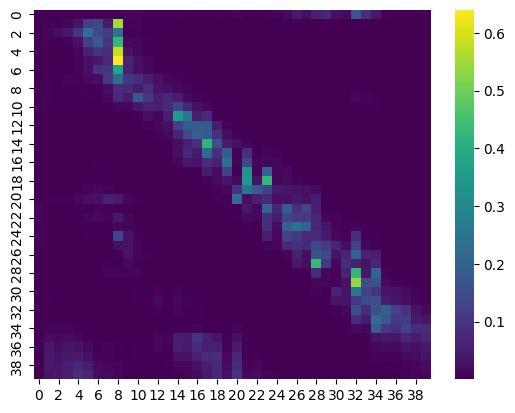

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(output[3][6][0:40,0:40], cmap='viridis', fmt=".2f")


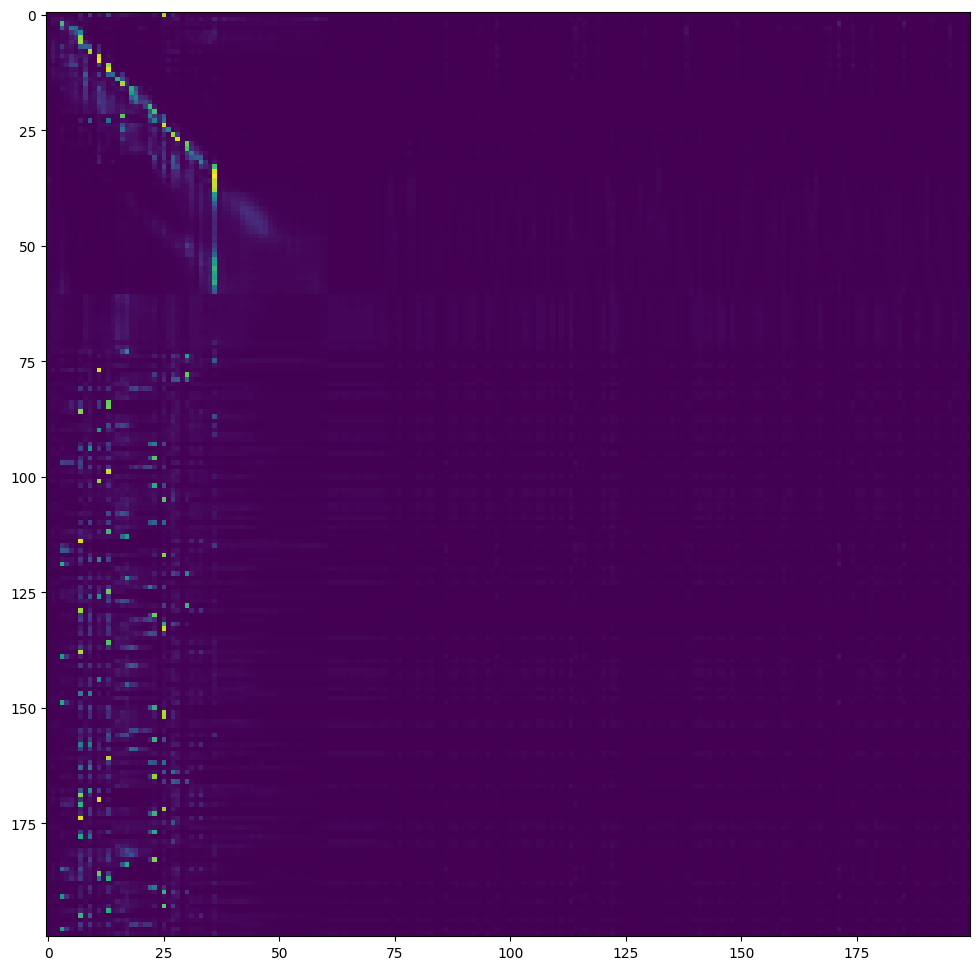

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24,12))
plt.imshow(tf.reduce_mean(output[5][:2],axis=0), cmap='viridis')

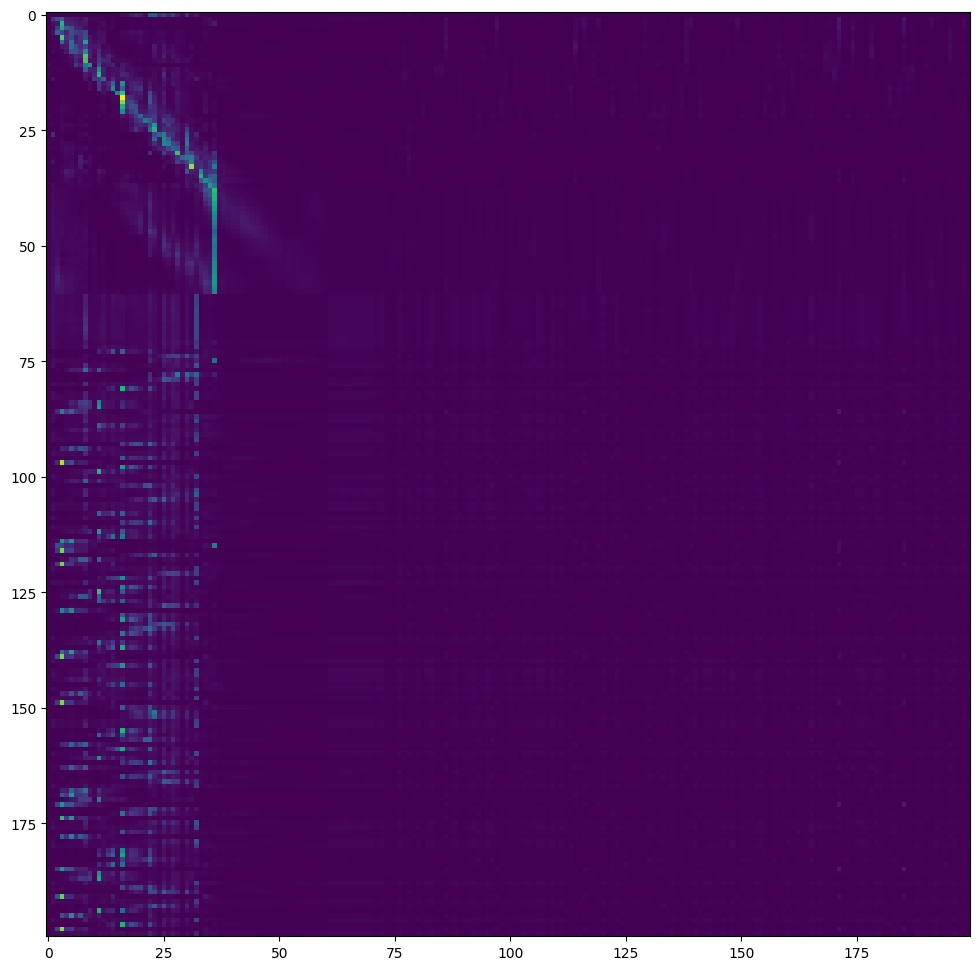

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24,12))
plt.imshow(tf.reduce_mean(output[5][2:],axis=0), cmap='viridis')

In [22]:
import os
import pickle

# 폴더 경로 설정
folder_path = './Final_data_token_SMILE/CLS/'  # 해당 경로를 실제 폴더 경로로 바꿔주세요

# 빈 리스트 초기화
merged_data = []

# 폴더 내의 모든 .pkl 파일을 탐색
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'rb') as file:
        # .pkl 파일 열기
        try:
            data = pickle.load(file)
            # 데이터를 하나의 리스트에 추가
            merged_data+=data[0]
            print(file_path,len(data[0]))
        except:
            pass
remove_list = []

for index,i in enumerate(merged_data):
    if len(i)>=180 or len(i)<5:
        remove_list.append(index)

remove_list.sort(reverse=True)

for i in remove_list:
    merged_data.pop(i)

./Final_data_token_SMILE/CLS/BBBP_vNN-ADMET 6696
./Final_data_token_SMILE/CLS/Hepatotoxicity-Cytotoxicity-HepG2_vNN-ADMET 121907
./Final_data_token_SMILE/CLS/CYP2C9_Inhibitor_vNN-ADMET 161019
./Final_data_token_SMILE/CLS/CYP2C19_Inhibitor_vNN-ADMET 162651
./Final_data_token_SMILE/CLS/CYP2D6_Inhibitor_vNN-ADMET 155680
./Final_data_token_SMILE/CLS/HLM_metab_vNN-ADMET 64380
./Final_data_token_SMILE/CLS/BBBP_MoleculeNet 40204
./Final_data_token_SMILE/CLS/DILI_vNN-ADMET 27864
./Final_data_token_SMILE/CLS/CYP1A2_Inhibitor_vNN-ADMET 150716
./Final_data_token_SMILE/CLS/BBBP_MoleculeNet_clean 40197
./Final_data_token_SMILE/CLS/CYP3A4_Inhibitor_vNN-ADMET 204184


In [23]:
import os
import pickle

# 폴더 경로 설정
folder_path = './Final_data_token_SMILE/REG/'  # 해당 경로를 실제 폴더 경로로 바꿔주세요

# 빈 리스트 초기화

# 폴더 내의 모든 .pkl 파일을 탐색
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'rb') as file:
        # .pkl 파일 열기
        try:
            data = pickle.load(file)
            # 데이터를 하나의 리스트에 추가
            merged_data+=data[0]
            print(file_path,len(data[0]))
        except:
            pass
remove_list = []

for index,i in enumerate(merged_data):
    if len(i)>=180:
        remove_list.append(index)

remove_list.sort(reverse=True)

for i in remove_list:
    merged_data.pop(i)

./Final_data_token_SMILE/REG/Lipophilicity_moleculenet 83975
./Final_data_token_SMILE/REG/FreeSolveSAMPL 9523


In [29]:
import os
import pickle

# 폴더 경로 설정
folder_path = './Final_data_token_SMILE/TOX/'  # 해당 경로를 실제 폴더 경로로 바꿔주세요

# 빈 리스트 초기화

# 폴더 내의 모든 .pkl 파일을 탐색
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'rb') as file:
        # .pkl 파일 열기
        try:
            data = pickle.load(file)
            # 데이터를 하나의 리스트에 추가
            merged_data+=data[0][0]
            print(file_path,len(data[0][0]))
        except:
            pass
remove_list = []

for index,i in enumerate(merged_data):
    if len(i)>=180:
        remove_list.append(index)

remove_list.sort(reverse=True)

for i in remove_list:
    merged_data.pop(i)

./Final_data_token_SMILE/TOX/Carcinogens_Lagunin 5501
./Final_data_token_SMILE/TOX/DILI 9403
./Final_data_token_SMILE/TOX/ClinTox 29009
./Final_data_token_SMILE/TOX/LD50_Zhu 141235
./Final_data_token_SMILE/TOX/hERG 13092
./Final_data_token_SMILE/TOX/AMES 139901
./Final_data_token_SMILE/TOX/hERG_Karim 268795
./Final_data_token_SMILE/TOX/Skin Reaction 7711


In [24]:
from tqdm import tqdm
import numpy as np 

def word_to_index(train_set,dict):
    result = []

    for molecule in tqdm(train_set):
        temp_list = []
        temp_list.append(1)
        for atom in molecule:
            try:
                temp_list.append(dict[atom])
            except:
                print(atom)
                dict[atom] = len(dict)+1
        while len(temp_list)<200:
            temp_list.append(0)
        if len(temp_list) == 200:
            result.append(temp_list)

    return result
embedding_word_merge = word_to_index(merged_data,molecule_dictionary)   
embedding_word_merge = np.array(embedding_word_merge)

  0%|          | 0/1227505 [00:00<?, ?it/s]

100%|██████████| 1227505/1227505 [00:18<00:00, 67872.54it/s]


In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 bert_tensor_small (BERT_tensor  (None, 141)         4555469     ['input_5[0][0]',                
 _small)                                                          'input_6[0][0]']                
                                                                                                  
Total params: 4,555,469
Trainable params: 4,555,469
Non-trainable params: 0
__________________

In [32]:
embedding_word_merge[300000:300015]

array([[ 1, 11, 10, ...,  0,  0,  0],
       [ 1, 11, 10, ...,  0,  0,  0],
       [ 1, 11, 10, ...,  0,  0,  0],
       ...,
       [ 1,  8, 12, ...,  0,  0,  0],
       [ 1, 11, 10, ...,  0,  0,  0],
       [ 1, 11, 10, ...,  0,  0,  0]])

In [33]:
len(molecule_dictionary)

147

In [253]:
len(molecule_dictionary)

141

In [53]:
model_temp.set_weights(paras)

In [33]:
inputs = Input(shape = (200,),dtype=tf.int32)
mask = Input(shape = (16), dtype=tf.int32)
outputs =BERT(256,8,1024,len(molecule_dictionary))(inputs,mask)
#outputs = BERT_tensor(256,6,1024,121)(inputs,mask,pretrain=True)

model_temp = Model(inputs = [inputs,mask], outputs = [outputs])
model_temp.summary()
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
model_temp.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 200)]        0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 bert (BERT)                    (None, 200, 256)     7265280     ['input_11[0][0]',               
                                                                  'input_12[0][0]']               
                                                                                                  
Total params: 7,265,280
Trainable params: 7,265,280
Non-trainable params: 0
________________

In [26]:
paras = model.get_weights()

In [54]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 200)]        0           []                               
                                                                                                  
 input_20 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 bert_4 (BERT)                  (None, 141)          7301517     ['input_19[0][0]',               
                                                                  'input_20[0][0]']               
                                                                                                  
Total params: 7,301,517
Trainable params: 7,301,517
Non-trainable params: 0
________________

: 

In [32]:
model_temp.set_weights(paras[:-2])

In [48]:
model_temp.set_weights(paras[:282])

In [53]:

import random
size = 300000
for k in range(1):
        for i in range(0,int(len(embedding_word_merge)/size)):
                lr = CustomLearningRateScheduler()
                if k == 0:
                        i = i
                """
                if i == int(len(embedding_word_merge)/size):
                        break
                if i+50 <80:
                        lr = (1e-4-1e-6)*(i)/80 + 1e-6
                else:
                        lr = 1e-4*np.sqrt(80)/np.sqrt(i)"""
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
                model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)
                max = 16
                mask_input = []
                print(i)
                for j in tqdm(merged_data[size*i:size*(i+1)]):
                        value = []
                        number = int(len(j)*0.15)
                        if number>max:
                                number = max
                        if number == 0:
                                number = 1
                        value += random.sample(range(1,len(j)),number)
                        mask_input.append(value)
                        
                        
                for j in mask_input:
                        while(len(j)<max):
                                j.append(-1)
                
                inputs1 = embedding_word_merge[size*i:size*(i+1)]
                inputs2 = mask_input
                output = tf.multiply(tf.reduce_sum(tf.one_hot(inputs2,200),axis=1),inputs1)

                
                random_value = inputs1.copy()        
                for _,index in enumerate(inputs2):
                        for j in index:
                                if j != -1:
                                        prob = np.random.rand(1)[0]
                                        if prob < 0.8:
                                                random_value[_][j] = 5
                                        elif prob > 0.9:
                                                temp1 = random.sample(range(0,len(molecule_dictionary)),1)[0]
                                                random_value[_][j] = temp1
                                                
                
                
                print(f'This is {i} number step')
                with tf.device('/device:GPU:0'):
                        if i % 3 == 0:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=32,validation_data=([np.array(random_value_val),np.array(mask_input_val)],np.array(output_val)))
                        else:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=32)
                        print(model.optimizer.lr)
                        with open('./BERT/SMILE/V_Pre_BERT.pkl','wb') as file:
                                paras = model.weights[:-2]
                                pickle.dump(paras,file)
                        #model.save_weights('./BERT/SMILE/small_tensor_Random_ZINC_L_model_weights')

0


  0%|          | 0/300000 [00:00<?, ?it/s]

100%|██████████| 300000/300000 [00:01<00:00, 181413.88it/s]


This is 0 number step
9375/9375 [==============================] - 489s 51ms/step - loss: 0.3389 - Mask_acc: 0.8788 - val_loss: 0.3249 - val_Mask_acc: 0.8923
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>
1


100%|██████████| 300000/300000 [00:01<00:00, 189234.14it/s]


This is 1 number step
2437/9375 [======>.......................] - ETA: 5:37 - loss: 0.2291 - Mask_acc: 0.9155

KeyboardInterrupt: 

In [109]:
with open('./BERT/SMILE/1M_random_ZINC_word2index.pkl','wb') as file:
    pickle.dump(molecule_dictionary,file)

In [41]:
inputs = Input(shape = (200,),dtype=tf.int32)
mask = Input(shape = (16), dtype=tf.int32)
outputs = BERT_tensor_small_GPU(256,8,1024,len(molecule_dictionary))(inputs,mask,pretrain=True)
#outputs = BERT_tensor(256,6,1024,121)(inputs,mask,pretrain=True)

model = Model(inputs = [inputs,mask], outputs = [outputs])
model.summary()
model.load_weights('./BERT/SMILE/tensor_BERT')

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 200)]        0           []                               
                                                                                                  
 input_18 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 bert_tensor_small_gpu_4 (BERT_  (None, 141)         4552909     ['input_17[0][0]',               
 tensor_small_GPU)                                                'input_18[0][0]']               
                                                                                                  
Total params: 4,552,909
Trainable params: 4,552,909
Non-trainable params: 0
________________

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import Embedding
inputs = Input(shape = (200,),dtype=tf.int32)
outputs = BERT(256,8,1024,len(molecule_dictionary))(inputs,None)


model_temp = Model(inputs = [inputs], outputs = [outputs])
model_temp.summary()
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
model_temp.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 200)]             0         
                                                                 
 bert_3 (BERT)               (None, 200, 256)          7265280   
                                                                 
Total params: 7,265,280
Trainable params: 7,265,280
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_temp.set_weights(paras[:-2])

In [69]:
model_temp.save_weights('./BERT/SMILE/small_tensor_Pre_BERT')

In [39]:
paras = model.get_weights()

In [67]:
temp_weights = model.get_weights()
all_weights = temp_weights[:16]*8 + temp_weights[16:]

In [68]:
class BERT(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim):
        super(BERT, self).__init__()
        self.encoder = tf.keras.Sequential([TransformerBlock(emb_dim,num_heads,ff_dim) for i in range(8)])
        #self.encoder = TransformerBlock(emb_dim,num_heads,ff_dim)
        #self.normalize = tf.keras.layers.LayerNormalization(epsilon=1e-8)
        
        self.embedding = TokenAndPositionEmbedding(200,3500,256)
        self.dense = layers.Dense(250,activation = 'gelu')
        self.classify = layers.Dense(len(molecule_dictionary),activation = 'softmax')
    def call(self, inputs, mask_index,pretrain = False):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
            
        hidden = self.embedding(inputs)
        hidden = self.encoder(hidden)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = self.dense(output)
            output = layers.Dropout(0.1)(output)
            output = self.classify(output)
            output = tf.boolean_mask(output,boolean_mask)
            return output
        else:
            return hidden

In [ ]:
model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)

In [ ]:
len(embedding_word)

50094160

In [69]:
inputs = Input(shape = (200,),dtype=tf.int32)
mask = Input(shape = (16), dtype=tf.int32)
outputs = BERT(256,6,1024)(inputs,mask,pretrain=True)

model = Model(inputs = [inputs,mask], outputs = [outputs])
model.summary()
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)
model.set_weights(all_weights)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 200)]        0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 bert_7 (BERT)                  (None, 71)           17863831    ['input_15[0][0]',               
                                                                  'input_16[0][0]']               
                                                                                                  
Total params: 17,863,831
Trainable params: 17,863,831
Non-trainable params: 0
______________

In [71]:
random_value_val

array([], dtype=float64)

In [77]:
import random
size = 300000
for k in range(11):
        for i in range(0,int(len(embedding_word)/size)):
                if k == 1:
                        i = i
                if i == int(len(embedding_word)/size):
                        break
                if i <80:
                        lr = (1e-4-1e-6)*(i)/80 + 1e-6
                else:
                        lr = 1e-4*np.sqrt(80)/np.sqrt(i)
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
                model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)
                max = 16
                mask_input = []
                for j in tqdm(train_set[size*i:size*(i+1)]):
                        value = []
                        number = int(len(j)*0.15)
                        if number>max:
                                number = max
                        if number == 0:
                                number = 1
                        value += random.sample(range(1,len(j)),number)
                        mask_input.append(value)
                        
                        
                for j in mask_input:
                        while(len(j)<max):
                                j.append(-1)
                
                
                
                
                
                
                inputs1 = embedding_word[size*i:size*(i+1)]
                inputs2 = mask_input
                output = tf.multiply(tf.reduce_sum(tf.one_hot(inputs2,200),axis=1),inputs1)

                
                random_value = inputs1.copy()        
                for _,index in enumerate(inputs2):
                        for j in index:
                                if j != -1:
                                        prob = np.random.rand(1)[0]
                                        if prob < 0.8:
                                                random_value[_][j] = 0
                                        elif prob > 0.9:
                                                temp1 = random.sample(range(0,301),1)[0]
                                                random_value[_][j] = temp1
                                                
                
                
                print(f'This is {i} number step')
                with tf.device('/device:GPU:0'):
                        if i % 20 == 0:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=256,callbacks = [early_stopping_cb],validation_data=([np.array(random_value_val),np.array(mask_input_val)],np.array(output_val)))
                        else:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=256,callbacks = [early_stopping_cb])
                        print(model.optimizer.lr)
                        model.save_weights('./BERT/SMILE/Random_ZINC_L_model_weights.h5')

  0%|          | 0/300000 [00:00<?, ?it/s]

100%|██████████| 300000/300000 [00:01<00:00, 186390.67it/s]


This is 0 number step
1172/1172 [==============================] - 392s 321ms/step - loss: 0.5511 - Mask_acc: 0.8475 - val_loss: 0.9338 - val_Mask_acc: 0.7538
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 204244.64it/s]


This is 1 number step


KeyboardInterrupt: 